# Data Cleaning 

Check for missing values 

In [218]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [219]:
pd.set_option('display.max_columns', None)

In [220]:
df = pd.read_csv('../data/games_manipulated.csv', low_memory=False)
df_teams = pd.read_csv('../data/teams.csv',low_memory=False)
df_recruits = pd.read_csv('../data/recruits.csv',low_memory=False)
df_roster = pd.read_csv('../data/roster.csv',low_memory=False)
df_draft = pd.read_csv('../data/draft.csv',low_memory=False)
df_team_talent = pd.read_csv('../data/team_talent.csv',low_memory=False)

In [221]:
df.head() 

,Unnamed: 0,index,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag,game_that_season
0,0,1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,153,SEC,ACC,27.0,10.0,17.0,"[17, 3, 7, 0]","[0, 7, 3, 0]",1759.0,1785.0,1638.0,1612.0,1,1
1,1,324,332572579,2013,3,regular,2013-09-14T23:00:00.000Z,NaN,True,False,True,81371.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,238,SEC,SEC,35.0,25.0,10.0,"[21, 7, 7, 0]","[0, 10, 0, 15]",1769.0,1777.0,1644.0,1636.0,1,3
2,2,671,332782579,2013,6,regular,2013-10-05T23:30:00.000Z,NaN,True,False,True,82313.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,96,SEC,SEC,35.0,28.0,7.0,"[14, 10, 3, 8]","[0, 7, 0, 21]",1780.0,1768.0,1353.0,1365.0,1,5
3,3,1011,333062579,2013,10,regular,2013-11-02T16:21:00.000Z,NaN,True,False,True,82111.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,344,SEC,SEC,34.0,16.0,18.0,"[14, 3, 17, 0]","[7, 3, 0, 6]",1872.0,1890.0,1634.0,1616.0,1,9
4,4,1295,333202579,2013,12,regular,2013-11-17T00:00:00.000Z,NaN,True,False,True,83853.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,57,SEC,SEC,19.0,14.0,5.0,"[3, 3, 7, 6]","[7, 7, 0, 0]",1890.0,1887.0,1675.0,1678.0,1,10


In [222]:
df_recruits.isna().sum() 

Unnamed: 0            0
index                 0
id                    0
athlete_id        12965
recruit_type          0
year                  0
ranking             360
name                  0
school              275
committed_to       7342
position             19
height               62
weight               67
stars                 0
rating                0
city                298
state_province      304
country             196
latitude            470
longitude           470
dtype: int64

In [223]:
df_recruits[df_recruits['ranking'].isna()]

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude
23277,23277,3915,46488,4361540.0,HighSchool,2018,NaN,Leki Nunn,Junipero Serra,San José State,WR,70.0,177.0,2,0.7480,San Mateo,CA,USA,37.543968,-122.306679
23278,23278,3916,44191,NaN,HighSchool,2018,NaN,Lavon Wallace,Buhach Colony,Colorado,S,75.0,185.0,3,0.8418,Atwater,CA,USA,37.347717,-120.609084
23279,23279,3917,44376,NaN,HighSchool,2018,NaN,Cameron Phillips,Clear Lake,Arizona State,S,74.0,180.0,3,0.8355,Houston,TX,USA,29.758938,-95.367697
23280,23280,3918,46463,NaN,HighSchool,2018,NaN,Cole Burnison,Canisius,Buffalo,TE,75.0,225.0,2,0.7497,NaN,NaN,NaN,NaN,NaN
23281,23281,3919,45642,NaN,HighSchool,2018,NaN,Grant Mileski,Horizon,New Mexico State,TE,77.0,230.0,2,0.7803,Scottsdale,AZ,USA,33.494219,-111.926018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31779,31779,4302,62865,NaN,HighSchool,2020,NaN,Dylan McGill,Mesquite,NaN,ATH,73.5,194.0,3,0.8443,Mesquite,TX,USA,32.766610,-96.599472
31780,31780,4303,62648,4565355.0,HighSchool,2020,NaN,Dexter Williams II,NaN,Indiana,DUAL,73.0,190.0,3,0.8511,Macon,GA,USA,32.840695,-83.632402
31781,31781,4304,62697,4430931.0,HighSchool,2020,NaN,Dontavious Turner,NaN,Southern Mississippi,ATH,72.0,180.0,3,0.8498,Magnolia,MS,USA,31.143233,-90.458708
31782,31782,4305,64146,4604658.0,HighSchool,2020,NaN,Brent VanderVeen,NaN,Wyoming,S,74.0,190.0,3,0.8079,NaN,NaN,NaN,NaN,NaN


## Missingness 

### Game data

In [224]:
## Check Missingness 
percent_missing = round(df['team_pregame_elo'].isnull().sum()  / df['team_pregame_elo'].shape[0], 2)
print(f'Peercent of ELO that are missing: {percent_missing}')

Peercent of ELO that are missing: 0.61


In [225]:
# Get the missing rate and count of games 
result_df = df.groupby(['game_that_season', 'season']).agg(
    percent_missing=('team_pregame_elo', lambda x: (x.isnull().mean()) * 100),
    count=('team_pregame_elo', 'count')
).reset_index()


result_df.head(19) 

,game_that_season,season,percent_missing,count
0,1,2013,69.551282,95
1,1,2014,72.185430,84
2,1,2015,72.542373,81
3,1,2016,72.297297,82
4,1,2017,69.178082,90
5,1,2018,70.805369,87
6,1,2019,69.966997,91
7,1,2020,24.836601,115
8,1,2021,78.587699,94
9,1,2022,81.021898,130


<Axes: xlabel='game_that_season', ylabel='percent_missing'>

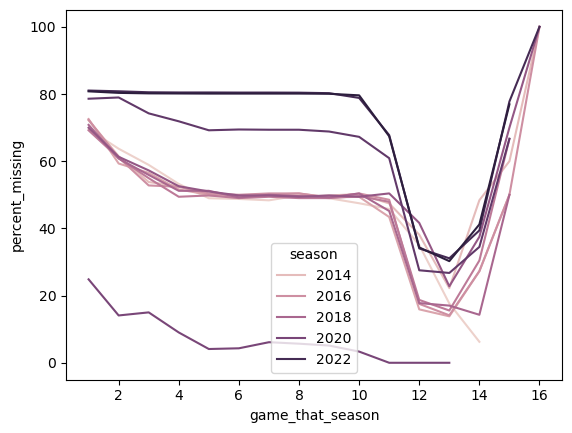

In [226]:
# Shows that we tend to see moroe missing NLOs around the 12-14 games 
# Also notice that 2020 had a lot less games, and some other years also had less games
sns.lineplot(result_df, x='game_that_season', y='percent_missing' , hue='season')

<Axes: xlabel='game_that_season', ylabel='count'>

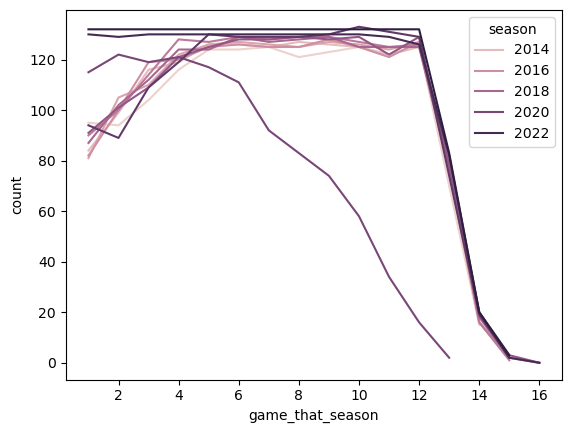

In [227]:
# Show the distribution of games across years
sns.lineplot(result_df, x='game_that_season', y='count' , color='grey', hue='season')

In [228]:
## When does this missingness happen? 
power_5_conf = ['Pac-12', 'Big 12', 'ACC', 'SEC', 'Big Ten']

# team_conference
team_conference = df[df['team_conference'].isin(power_5_conf)]

team_conference.groupby(['season']).agg(
    percent_missing=('team_pregame_elo', lambda x: (x.isnull().mean()) * 100),
    count=('team_pregame_elo', 'count')
).reset_index().sort_values(by='season')

 

,season,percent_missing,count
0,2013,6.532663,744
1,2014,6.416465,773
2,2015,6.067961,774
3,2016,5.968331,772
4,2017,5.237515,778
5,2018,5.839416,774
6,2019,6.090134,771
7,2020,1.578947,561
8,2021,5.731707,773
9,2022,0.121803,820


Teams in the Power 5 conference have a higher completion rate for the ELO rating 

In [250]:
# regular_df.head()
df.head() 

,Unnamed: 0,index,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag,game_that_season
0,0,1,332412579,2013,1,regular,2013-08-29T22:00:00.000Z,NaN,True,False,False,81572.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,153,SEC,ACC,27.0,10.0,17.0,"[17, 3, 7, 0]","[0, 7, 3, 0]",1759.0,1785.0,1638.0,1612.0,1,1
1,1,324,332572579,2013,3,regular,2013-09-14T23:00:00.000Z,NaN,True,False,True,81371.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,238,SEC,SEC,35.0,25.0,10.0,"[21, 7, 7, 0]","[0, 10, 0, 15]",1769.0,1777.0,1644.0,1636.0,1,3
2,2,671,332782579,2013,6,regular,2013-10-05T23:30:00.000Z,NaN,True,False,True,82313.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,96,SEC,SEC,35.0,28.0,7.0,"[14, 10, 3, 8]","[0, 7, 0, 21]",1780.0,1768.0,1353.0,1365.0,1,5
3,3,1011,333062579,2013,10,regular,2013-11-02T16:21:00.000Z,NaN,True,False,True,82111.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,344,SEC,SEC,34.0,16.0,18.0,"[14, 3, 17, 0]","[7, 3, 0, 6]",1872.0,1890.0,1634.0,1616.0,1,9
4,4,1295,333202579,2013,12,regular,2013-11-17T00:00:00.000Z,NaN,True,False,True,83853.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,57,SEC,SEC,19.0,14.0,5.0,"[3, 3, 7, 6]","[7, 7, 0, 0]",1890.0,1887.0,1675.0,1678.0,1,10


In [251]:
# # Grab the last game in the regular season 
# regular_df = df[df['season_type'] == 'regular']
# # regular_df[regular_df['season'] == 2022].sort_values('game_that_season')
# last_regular_season = regular_df.groupby('season')['game_that_season'].max().reset_index().sort_values(by='season')
# last_regular_season['game_that_season']  = last_regular_season['game_that_season'] - 1
# last_regular_season 
# filtered_df = pd.merge(last_regular_season, df, on=['season', 'game_that_season'], how='left')
# filtered_df = filtered_df[ (filtered_df['team_conference'].isin(power_5_conf))]
# filtered_df.head() 

In [272]:
cols = ['season', 'game_that_season', 'season_type', 'team_conference','main_team','opposing_team_id','conference_game','team_postgame_elo', 'team_pregame_elo', 'win_flag']

filtered_df = df[cols]

# Show games in 13 games 
filtered_df = filtered_df[filtered_df['game_that_season'] == 12]
filtered_df = filtered_df[filtered_df['team_conference'].isin(power_5_conf)]
filtered_df = filtered_df[filtered_df['season'] != 2020] # outliar

filtered_df.rename(columns={'season':'year', 'main_team': 'school'},inplace=True)

filtered_df.head()

,year,game_that_season,season_type,team_conference,school,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag
6,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1
20,2015,12,regular,SEC,South Carolina,228,False,1579.0,1561.0,0
35,2017,12,regular,SEC,South Carolina,228,False,1572.0,1586.0,0
42,2018,12,regular,SEC,South Carolina,2006,False,1641.0,1627.0,1
49,2019,12,regular,SEC,South Carolina,228,False,1497.0,1501.0,0


In [273]:
# Number of null values 
filtered_df['team_postgame_elo'].isna().sum() 

1

In [281]:
# Show that there is a unique school for each row
filtered_df.groupby(['year'])['school'].agg({'nunique', 'count'})

,count,nunique
year,,
2013,62,62
2014,64,64
2015,64,64
2016,64,64
2017,62,62
2018,63,63
2019,64,64
2021,64,64
2022,62,62


### Game data

Based on this, grab the game that has the lowest elo_missing_percentage and higher amount of games = the week before thee last game in the regular season 

- make sure elo rating is as complete as possible 
    - get only power conference 
    - get the week before the last regular season game 
    

### Combine with team talent

In [283]:
teams = filtered_df['school'].unique() 
filtered_team_talend_df = df_team_talent[df_team_talent['school'].isin(teams)]
filtered_team_talend_df

,year,school,talent
0,2015,Alabama,981.90
1,2015,USC,926.71
2,2015,Ohio State,907.32
3,2015,Florida State,889.92
4,2015,LSU,889.37
...,...,...,...
1837,2023,Kansas State,616.00
1838,2023,Syracuse,610.75
1839,2023,Wake Forest,603.68
1842,2023,BYU,576.25


In [294]:
total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 
total_elo_talent.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1


In [288]:
import numpy as np 

/Users/andreeaserban/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


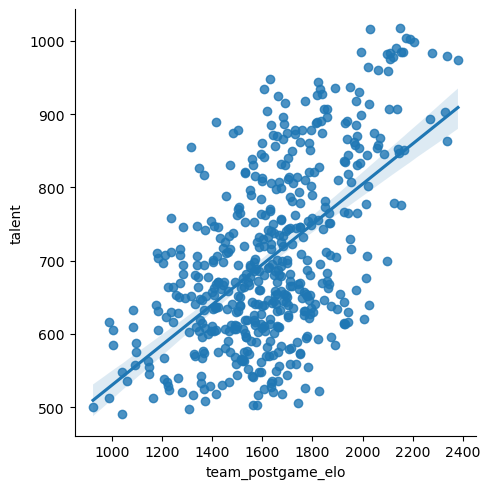

In [293]:
# sns.scatterplot(data=total_elo_talent, x='team_postgame_elo', y='talent')
# x = total_elo_talent['team_postgame_elo']
# y = total_elo_talent['talent']
sns.lmplot(data=total_elo_talent, x='team_postgame_elo', y='talent')

# plt.scatter(x, y, label='Data Points')
# slope, intercept = np.polyfit(x, y, 1)

# plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

# slope, intercept = np.polyfit(x, y, 1)


In [192]:
filtered_df.head() 

,season,game_that_season,Unnamed: 0,index,id,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag
0,2013,12,6,1469,333342579,14,regular,2013-12-01T00:00:00.000Z,NaN,True,False,False,84174.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,228,SEC,ACC,31.0,17.0,14.0,"[7, 10, 0, 14]","[7, 3, 7, 0]",2001.0,2024.0,1942.0,1919.0,1
1,2013,12,214,1440,333340238,14,regular,2013-11-30T17:21:00.000Z,NaN,True,False,False,33019.0,3973.0,Vanderbilt Stadium,NaN,NaN,NaN,Wake Forest,0,154,238,ACC,SEC,21.0,23.0,-2.0,"[7, 7, 7, 0]","[7, 10, 0, 6]",1313.0,1316.0,1606.0,1603.0,0
2,2013,12,356,1437,333340127,14,regular,2013-11-30T17:00:00.000Z,NaN,True,False,True,71418.0,3936.0,Spartan Stadium,NaN,NaN,NaN,Minnesota,0,135,127,Big Ten,Big Ten,3.0,14.0,-11.0,"[0, 3, 0, 0]","[7, 0, 7, 0]",1569.0,1572.0,1893.0,1890.0,0
6,2013,12,913,1456,333340084,14,regular,2013-11-30T20:30:00.000Z,NaN,True,False,True,44882.0,3830.0,Memorial Stadium,NaN,NaN,NaN,Indiana,1,84,2509,Big Ten,Big Ten,56.0,36.0,20.0,"[14, 21, 14, 7]","[0, 9, 7, 20]",1432.0,1450.0,1141.0,1123.0,1
17,2013,12,2279,1447,333340254,14,regular,2013-11-30T19:00:00.000Z,NaN,True,False,True,45023.0,587.0,Rice-Eccles Stadium,NaN,NaN,NaN,Utah,1,254,38,Pac-12,Pac-12,24.0,17.0,7.0,"[14, 7, 0, 3]","[0, 0, 7, 10]",1514.0,1502.0,1097.0,1109.0,1


In [191]:
# total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 

# filtered_df = pd.merge(last_regular_season, df, on=['season', 'game_that_season'], how='left')


In [180]:
# df_team_talent.head() 
# match on year and team too get full roster 

# df_roster.head() 

array(['South Carolina', 'Wake Forest', 'Minnesota', 'Indiana', 'Utah',
       'Vanderbilt', 'Miami', 'Michigan State', 'Kansas State', 'Arizona',
       'West Virginia', 'Ohio State', 'Wisconsin', 'Boston College',
       'Illinois', 'Georgia Tech', 'Florida', 'Maryland', 'NC State',
       'Texas A&M', 'Michigan', 'Oklahoma State', 'Virginia',
       'Penn State', 'Iowa', 'Arkansas', 'Oregon', 'Duke',
       'Virginia Tech', 'Tennessee', 'Oregon State', 'Missouri', 'Auburn',
       'Oklahoma', 'Baylor', 'Nebraska', 'Iowa State', 'Texas', 'Clemson',
       'TCU', 'UCLA', 'Washington', 'California', 'Pittsburgh',
       'Arizona State', 'Kentucky', 'Purdue', 'North Carolina',
       'Mississippi State', 'Georgia', 'Northwestern', 'Ole Miss',
       'Texas Tech', 'Kansas', 'LSU', 'Colorado', 'USC', 'Stanford',
       'Florida State', 'Syracuse', 'Washington State', 'Alabama',
       'Louisville', 'Rutgers', 'UCF'], dtype=object)

### Draft Data

In [190]:
# cols = ['season', 'game_that_season', 'season_type', 'main_team','opposing_team_id','conference_game','team_postgame_elo', 'team_pregame_elo', 'win_flag']

# filtered_df[cols].head()

# draft_cols = ['draft_year', 'College/Univ', 'Player','Pick']
# df_draft.head()